<p style="color:#694b98;
          text-align:center;
          font-size:240%;
          font-weight: bold;
          font-family:Serif;">
    Car Price Prediction </p>

<center>
<img src = https://img.money.com/2023/01/News-2023-Used-Car-Prices1.jpg?crop=0px%2C193px%2C3725px%2C2095px&quality=60&w=1600 width=600 >
</center>

<font color='694b98'>Table of contents<font><a class='anchor' id='top'></a>

- [Overview](#overview)
- [Import Libraries](#Libraries)
- [Load Dataset](#Dataset)
- [Data Preprocessing](#Preprocessing)
- [Data Visualizing](#Visualizing)
- [Model Building](#Model)


<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Overview </center> </b>
    <a name="Overview"></a>
</div><br>

<p style="font-size:120%;font-family:Sans-serif;">   
In this notebook, We will make a linear regression model, trained with car dataset, to predict selling price of the cars.
</p> <br>

|Features|
|---------|
|Age|
|Present_Price|
|Kms_Driven|	
|Fuel_Type|
|Seller_Type|	
|Transmission|
|Owner|	

|Target|
|------|
|Selling_Price|
    


<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Import Libraries </center> </b>
    <a name="Libraries"></a>
</div><br>

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

filterwarnings("ignore")

<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Load Dataset </center> </b>
    <a name="Dataset"></a>
</div><br>

In [212]:
data = pd.read_csv('cardata.csv')
main_df = pd.DataFrame(data)
df = main_df.copy()

In [213]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [214]:
df.describe(include ='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 301 entries, 0 to 300

Data columns (total 9 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Car_Name       301 non-null    object 

 1   Year           301 non-null    int64  

 2   Selling_Price  301 non-null    float64

 3   Present_Price  301 non-null    float64

 4   Kms_Driven     301 non-null    int64  

 5   Fuel_Type      301 non-null    object 

 6   Seller_Type    301 non-null    object 

 7   Transmission   301 non-null    object 

 8   Owner          301 non-null    int64  

dtypes: float64(2), int64(3), object(4)

memory usage: 21.3+ KB


<p style="font-size:120%;font-family:Sans-serif;">   
4 features are object type. Car_Name, Fuel_Type, Seller_Type, and Transmission which Car_Name will be removed and the other ones will be converted to numerical features in the next steps.  
</p> 

<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Data Preprocessing </center> </b>
    <a name="Preprocessing"></a>
</div><br>

<p style="font-size:120%;font-family:Sans-serif;">     
Production year of the car is converted to the age.
</p> 

In [216]:
Age = (df['Year'].max()+1)-df['Year']
df.insert(0,'Age', Age)
df.drop(columns = ['Year','Car_Name'], inplace = True)

<p style="font-size:120%;font-family:Sans-serif;">   
  The existance of the Null value is checked. No missing value.
</p> 

In [217]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<p style="font-size:120%;font-family:Sans-serif;">   
    The existance of the duplicated rows are checked.  
</p> 

In [218]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [219]:
df.drop_duplicates(inplace=True)
df.reset_index(drop = True , inplace = True)

<p style="font-size:120%;font-family:Sans-serif;">   
The dataset has two duplicated values, which we remove the duplicated ones. 
    </p>

In [220]:
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


<p style="font-size:120%;font-family:Sans-serif;">   
    To check existance of the noise data, scatter plots are shown.
</p> 

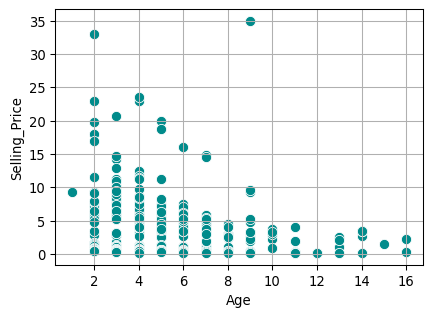

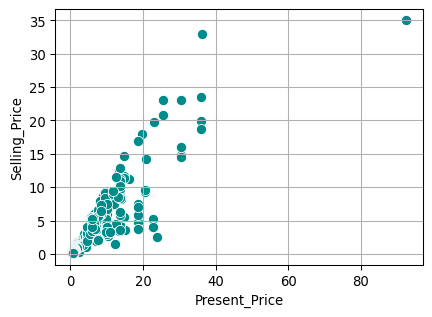

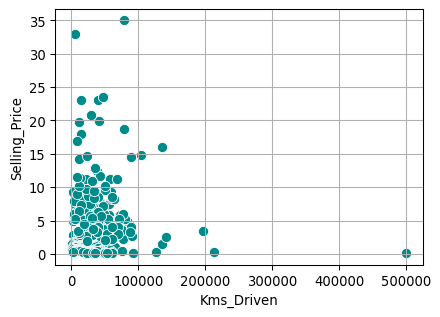

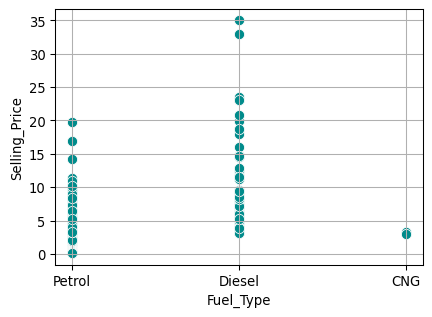

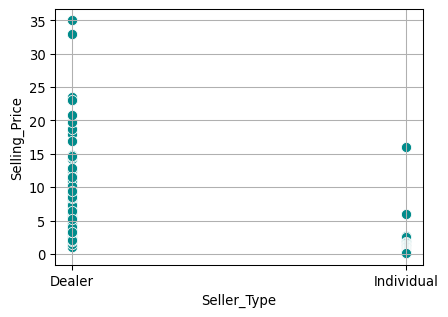

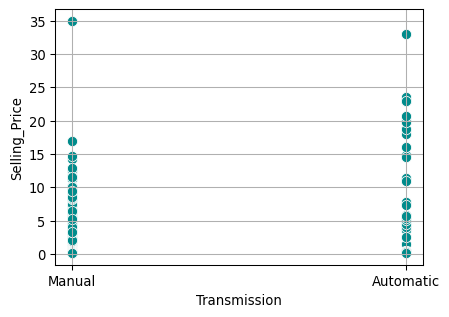

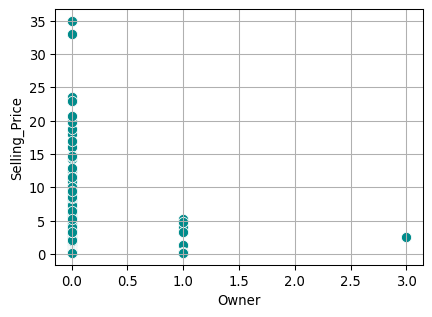

In [221]:
# Cheking Noise with scatter plots
for col in df.drop(columns=['Selling_Price']).columns:
    fig, ax = plt.subplots(1,1, figsize=(5,3.5) , dpi = 95)
    sns.scatterplot(x=col, y='Selling_Price', data=df, color='darkcyan',s=60)
    ax.grid()

<p style="font-size:120%;font-family:Sans-serif;">   
Present_Price feature has almost linear relation with Selling_Price.
<br>Data points which seem to be noise or outlier:
</p> 

In [222]:
df[(df["Age"]==9) & (df["Selling_Price"]==35)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [223]:
df[(df["Present_Price"]>80) & (df["Selling_Price"]==35)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [224]:
df[(df["Kms_Driven"]==500000) & (df["Selling_Price"]<5)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
194,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


<p style="font-size:120%;font-family:Sans-serif;">   
At first glance, these data may appear as noise in a feature, but considering their values in other features, they do not seem to be outliers.</p>

<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Data Visualizing </center> </b>
    <a name="Visualizing"></a>
</div><br>

<p style="font-size:120%;font-family:Sans-serif;">   
To get more familiar with the data, we print the number of unique values for each column to become familiar with categorical data as well.</p>

In [225]:
categorical_features = []
for col in df.drop(columns=['Selling_Price']).columns:
    print(col)
    num_uniq = df[col].nunique()
    print('Unique values: ',    num_uniq)
    if num_uniq <= 5:
        categorical_features.append(col)
        print(df[col].value_counts())
    print('***********************')

Age

Unique values:  16

***********************

Present_Price

Unique values:  147

***********************

Kms_Driven

Unique values:  206

***********************

Fuel_Type

Unique values:  3

Petrol    239

Diesel     58

CNG         2

Name: Fuel_Type, dtype: int64

***********************

Seller_Type

Unique values:  2

Dealer        193

Individual    106

Name: Seller_Type, dtype: int64

***********************

Transmission

Unique values:  2

Manual       260

Automatic     39

Name: Transmission, dtype: int64

***********************

Owner

Unique values:  3

0    288

1     10

3      1

Name: Owner, dtype: int64

***********************


<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Categorical features Analysis</p>

In [226]:
categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

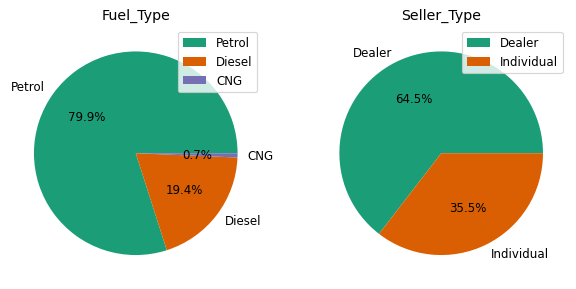

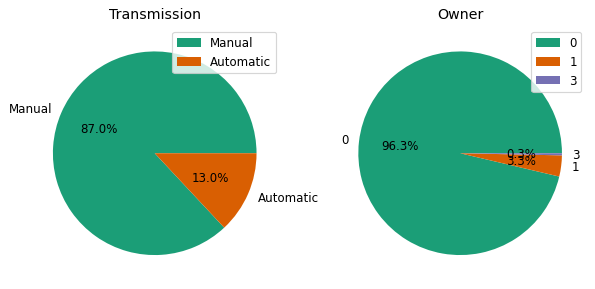

<Figure size 722.5x722.5 with 0 Axes>

In [227]:
sns.set_palette('Dark2')
fig = plt.figure(figsize=(8.5,8.5), dpi=85)  
fig.subplots_adjust(wspace=0.2)

j=1
for col in categorical_features:
    plt.subplot(1,2,j)
    plt.pie(df[col].value_counts() ,labels=list(df[col].value_counts().index),autopct='%.1f%%')
    plt.legend(fontsize=10)
    plt.title(col,fontsize=12)
    j += 1
    if j>2:
        fig = plt.figure(figsize=(8.5,8.5), dpi=85)  
        fig.subplots_adjust(wspace=0.2)
        j=1

 <ul style="font-size:120%;font-family:Sans-serif;"> 
<li> Most of the cars use Petrol fuel.</li>
<li> Most of the cars are of manual transmission.</li>
<li> Most cars are sold by dealers.</li>
<li> Most cars are used by one user.</li>
   </ul>   

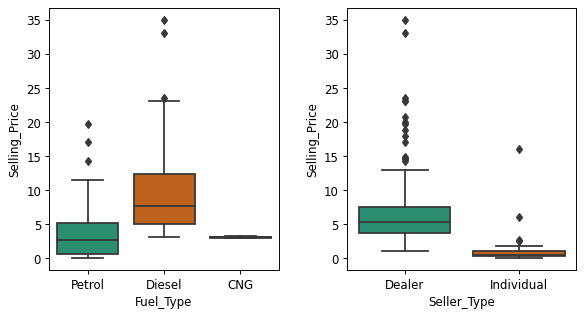

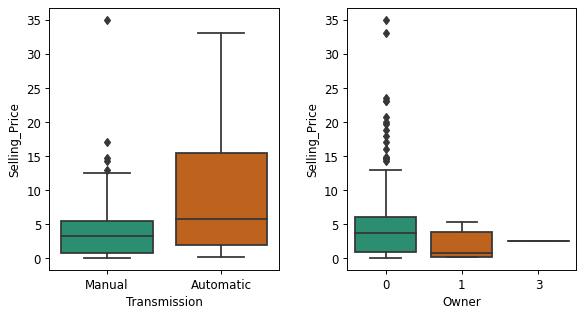

<Figure size 680x340 with 0 Axes>

In [228]:
sns.set_palette('Dark2')
fig = plt.figure(figsize=(8,4), dpi=85)  
fig.subplots_adjust(wspace=0.3)

j=1
for col in categorical_features:
    plt.subplot(1,2,j)
    sn = sns.boxplot(data=df, y= "Selling_Price", x = col) 
    j += 1
    if j>2:
        fig = plt.figure(figsize=(8,4), dpi=85)  
        fig.subplots_adjust(wspace=0.3)
        j=1    

 <ul style="font-size:120%;font-family:Sans-serif;"> 
<li> Diesel cars have a higher selling price.</li>
<li> The selling price of cars traded by dealers is higher than those traded by individuals.</li>
<li> The selling price of automatic cars is higher than manual ones.</li>
<li>When there are more previous owners of a car, the selling price decreases.</li>
   </ul>  

<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Numerical features Analysis</p>

In [229]:
# Non categirical features
import numpy as np
noncategorical_features = np.setdiff1d(df.columns, categorical_features).tolist()
noncategorical_features

['Age', 'Kms_Driven', 'Present_Price', 'Selling_Price']

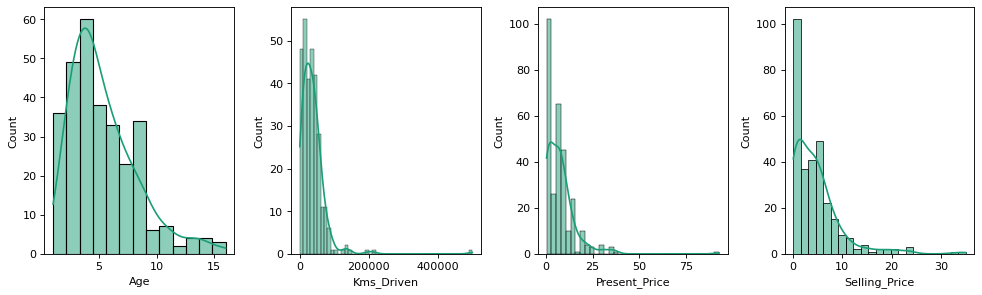

In [230]:
sns.set_palette('Dark2')

fig = plt.figure(figsize=(15,4), dpi=80)  
fig.subplots_adjust(wspace=0.3)

j=1
for col in noncategorical_features:
    plt.subplot(1,4,j)
    sn = sns.histplot(data=df, x=col,kde = True)   
    j += 1

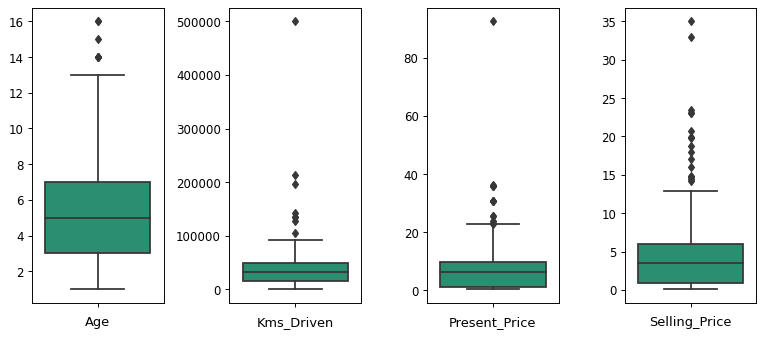

In [231]:
sns.set_palette('Dark2')
fig = plt.figure(figsize=(11,4.5), dpi=85)  

j=1
for col in noncategorical_features:
    plt.subplot(1,4,j)
    sn = sns.boxplot(data=df[col])
    sn.set_xlabel(col, fontsize=11)
    sn.set_xticklabels([])
    j += 1
plt.subplots_adjust(wspace=0.5) 

<ul style="font-size:120%;font-family:Sans-serif;"> 
<li> The values of the age feature range from 1 to 13, with most data between 3 and 7.</li>
<li> The values of the Kms_Driven range from 500 to 100000, with most values between 10000 and 50000.</li>
<li> The present prices of the cars range from 0.3 to 25, with most values between 2 and 10.</li>
<li> The selling prices of the cars range from 0.1 to 13, with most values between 2 and 7.</li>
</ul> 

<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Correlation between features</p>

Selling_Price    1.000000
Present_Price    0.876378
Kms_Driven       0.028566
Owner           -0.087880
Age             -0.234369
Name: Selling_Price, dtype: float64

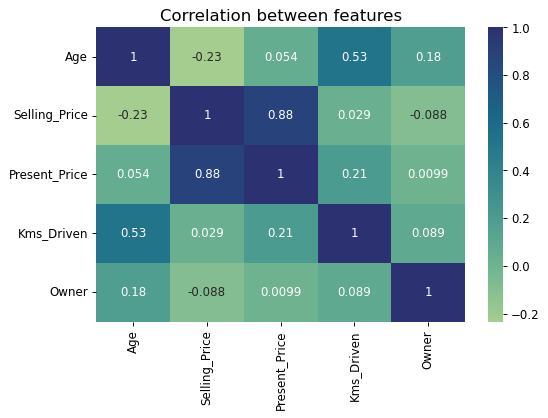

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5), dpi=85)

sns.heatmap(df.corr(), annot=True, ax=ax, cmap= 'crest')
plt.title('Correlation between features', fontsize=14)
df.corr()['Selling_Price'].sort_values(ascending=False)

<p style="font-size:120%;font-family:Sans-serif;">   
"Present_Price" is the most relevent feature to the target.
<br>Below, scatter plots show relation between "Present_Price" feature and the other features.
</p>

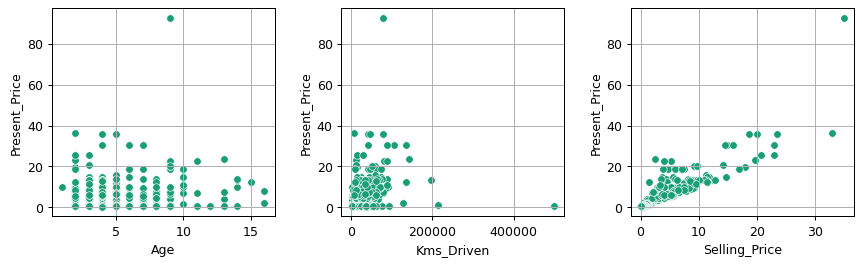

In [233]:
sns.set_palette('Dark2')

cols=noncategorical_features.copy()
cols.remove('Present_Price')
fig=plt.figure(figsize=(11.5,3),dpi=90)
fig.subplots_adjust(wspace=0.3)

j=1
for col in cols:
    plt.subplot(1,3,j)
    sn = sns.scatterplot(y='Present_Price', x=col,data=df)
    sn.grid()
    j += 1

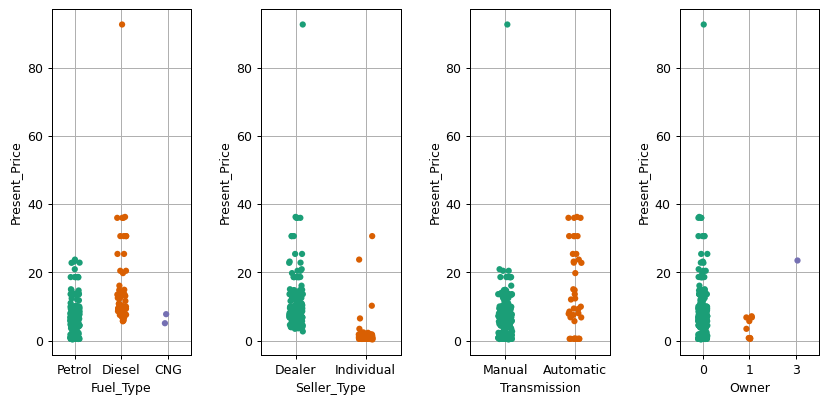

In [234]:
sns.set_palette('Dark2')

fig=plt.figure(figsize=(11,5),dpi=90)
fig.subplots_adjust(wspace=0.5)
j=1
for col in categorical_features:
    plt.subplot(1,4,j)
    sn=sns.stripplot(data=df, x=col, y="Present_Price")
    sn.grid()
    j += 1
    

<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Handle object types</p>

<p style="font-size:120%;font-family:Sans-serif;">   
In order to process data effectively, it is important to represent all object type data as numerical values. This involves encoding the three columns - Transmission, Seller_Type, and Fuel_Type - with unique numerical values that aren't 0 and 1. This is because, in dimension increasing or feature combination, using 0 and 1 would not effect and the values would remain constant.</p>

In [235]:
mapping_Fuel_Type = {'CNG': 2, 'Petrol': 3, 'Diesel':4}
mapping_Seller_Type = {'Individual': 2, 'Dealer': 3}
mapping_Transmission = {'Manual': 2, 'Automatic': 3}

df.replace({'Fuel_Type': mapping_Fuel_Type, 'Seller_Type': mapping_Seller_Type, 
            'Transmission':mapping_Transmission}, inplace = True)


In [236]:
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,3,3,2,0
1,6,4.75,9.54,43000,4,3,2,0
2,2,7.25,9.85,6900,3,3,2,0
3,8,2.85,4.15,5200,3,3,2,0
4,5,4.60,6.87,42450,4,3,2,0


<br><div  class="alert alert-success" style="background-color: #694b98; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Model Building </center> </b>
    <a name="Model"></a>
</div><br>

<p style="font-size:120%;font-family:Sans-serif;">   
In order to model dataset to predict seling price as target, Linear Regressin algorithm is implemented.</p>

In [237]:
# variables
K = 10  # number of folds
test_size = 0.2
random_state = 0


# Normalize
X_norm = df.drop(['Selling_Price'], axis = 1)
scaler = MinMaxScaler(feature_range = (0,1))
normalized = scaler.fit_transform(X_norm)

X = pd.DataFrame(normalized,  columns = X_norm.columns)
Y = df['Selling_Price'].values.reshape(-1,1)

# Split test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)


print("\n Shape of data:")
print('Shape of X train: ', X_train.shape)
print('Shape of Y train: ', Y_train.shape)
print('Shape of X test: ', X_test.shape)
print('Shape of Y test: ', Y_test.shape)

# Build and Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict test values
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)

print('   --------------------   ')
print("Evaluation:")
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred_test))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_pred_test))
print('Root Mean squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
print('R2 score_train: ', metrics.r2_score(Y_train,Y_pred_train))
print('R2 score_test: ', metrics.r2_score(Y_test,Y_pred_test))

print('   --------------------   ')
print("Cross Validation:")
model = LinearRegression()
cross_val = KFold (K)
cross_result = cross_val_score(model , X, Y, cv =cross_val)
print("Cross validation result: \n", cross_result)
print("Average R2 score: ",np.mean(cross_result))




 Shape of data:

Shape of X train:  (239, 7)

Shape of Y train:  (239, 1)

Shape of X test:  (60, 7)

Shape of Y test:  (60, 1)

   --------------------   

Evaluation:

Mean Absolute Error:  1.2758996218571605

Mean squared Error:  4.223635994782199

Root Mean squared Error:  2.0551486551542197

R2 score_train:  0.8906053261168038

R2 score_test:  0.7585370784368723

   --------------------   

Cross Validation:

Cross validation result: 

 [ 7.64827834e-01  8.91898654e-01  7.48975256e-01  8.32713869e-01

 -4.92400490e+01 -9.29052941e+02  1.76423766e-01  7.40857250e-01

  8.35832387e-01  8.62512275e-01]

Average R2 score:  -97.24389487436575


<p style="font-size:120%;font-family:Sans-serif;">   
The evaluation using cross-validation shows that there are some data points that do not have good scores. Therefore, we remove these data points.</p>

In [238]:
data_len = len(df)/K
data_len

29.9

In [239]:
# 29.9*4 = 119
# 29.9*6 = 180
df1 = df.iloc[0:119].append(df.iloc[180:])
df1.reset_index(inplace=True, drop=True)

<p style="font-size:120%;font-family:Sans-serif;">   
Dataset after dropping inappropriate data:</p>

In [240]:
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,3,3,2,0
1,6,4.75,9.54,43000,4,3,2,0
2,2,7.25,9.85,6900,3,3,2,0
3,8,2.85,4.15,5200,3,3,2,0
4,5,4.60,6.87,42450,4,3,2,0
...,...,...,...,...,...,...,...,...
233,3,9.50,11.60,33988,4,3,2,0
234,4,4.00,5.90,60000,3,3,2,0
235,10,3.35,11.00,87934,3,3,2,0
236,2,11.50,12.50,9000,4,3,2,0


<p style="font-size:120%;font-family:Sans-serif;">   
The below function helps to perform model building.</p>

In [241]:
def Train_Model(df):
    # Normalize
    X_norm = df.drop(['Selling_Price'], axis = 1)
    scaler = MinMaxScaler(feature_range = (0,1))
    normalized = scaler.fit_transform(X_norm)
    
    X = pd.DataFrame(normalized,  columns = X_norm.columns)
    Y = df['Selling_Price'].values.reshape(-1,1)
    # Split test and train
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    # Build and Train model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    # Predict
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    R2_score = metrics.r2_score(Y_test,Y_pred)
    return R2_score


<p style="font-size:120%;font-family:Sans-serif;">   
Train the model with new data:</p>

In [242]:
R2_score = Train_Model(df1)
print('R2_score: ', R2_score)


R2_score:  0.8400111888116448


<p style="font-size:120%;font-family:Sans-serif;">   
We can see the improvment of the score by deleting inappropriate data.</p>

<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Increase dimension of the features</p>

In [243]:
def check_dimension(dim , Columns):
    
    R2 = 0.8400111888116448  # last score
    for feature in Columns:
        
        df2[f'{feature}{dim}'] = df2[feature] ** dim # Add power of a feature as a new feature
        r2 = Train_Model(df2) # Train with new dataframe
        
        if r2 < R2:
            df2.drop(columns = [f'{feature}{dim}'] , inplace = True) 
        else:
            R2 = r2 
            
    print("R2_score: ", R2)
        
        
df2 = df1.copy()
col = df2.drop(['Selling_Price'], axis = 1).columns
check_dimension(2, col)        


R2_score:  0.8783910798784657


<p style="font-size:120%;font-family:Sans-serif;">   
Dataset after increasing the dimension of the features:</p>

In [244]:
df2.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age2,Present_Price2,Kms_Driven2,Fuel_Type2,Transmission2,Owner2
0,5,3.35,5.59,27000,3,3,2,0,25,31.2481,729000000,9,4,0
1,6,4.75,9.54,43000,4,3,2,0,36,91.0116,1849000000,16,4,0
2,2,7.25,9.85,6900,3,3,2,0,4,97.0225,47610000,9,4,0
3,8,2.85,4.15,5200,3,3,2,0,64,17.2225,27040000,9,4,0
4,5,4.60,6.87,42450,4,3,2,0,25,47.1969,1802002500,16,4,0


<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Combine the features</p>
<p style="font-size:120%;font-family:Sans-serif;">   
The feature that has the strongest correlation with the target is the Present_Price. We combine this feature with other features. The best scenario in which we have the highest score and the lowest error is as follows:</p>

In [245]:
df3 = df2.copy()

df3['PP_A'] =  df3['Present_Price'] * df3['Age'] 
df3['PP2_A'] =  df3['Present_Price2'] * df3['Age'] 
df3['PP_A2'] =  df3['Present_Price'] * df3['Age2'] 
df3['PP2_A2'] =  df3['Present_Price2'] * df3['Age2'] 


# df3['PP_T'] =  df3['Present_Price'] * df3['Transmission'] 
# df3['PP2_T'] =  df3['Present_Price2'] * df3['Transmission'] 
# df3['PP_T2'] =  df3['Present_Price'] * df3['Transmission2'] 
# df3['PP2_T2'] =  df3['Present_Price2'] * df3['Transmission2'] 

df3['PP_O'] =  df3['Present_Price'] * df3['Owner'] 
df3['PP2_O'] =  df3['Present_Price2'] * df3['Owner'] 
df3['PP_O2'] =  df3['Present_Price'] * df3['Owner2'] 
df3['PP2_O2'] =  df3['Present_Price2'] * df3['Owner2'] 


df3['PP_FT'] =  df3['Present_Price'] * df3['Fuel_Type'] 
df3['PP2_FT'] =  df3['Present_Price2'] * df3['Fuel_Type'] 
df3['PP_FT2'] =  df3['Present_Price'] * df3['Fuel_Type2'] 
df3['PP2_FT2'] =  df3['Present_Price2'] * df3['Fuel_Type2'] 


df3['PP_KD'] = df3['Present_Price']* df3['Kms_Driven']
df3['PP2_KD'] = df3['Present_Price2']* df3['Kms_Driven'] 
df3['PP_KD2'] = df3['Present_Price']* df3['Kms_Driven2'] 
df3['PP2_KD2'] = df3['Present_Price2']* df3['Kms_Driven2'] 


<p style="font-size:120%;font-family:Sans-serif;">   
Final dataset:</p>

In [246]:
df3.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age2,Present_Price2,...,PP_O2,PP2_O2,PP_FT,PP2_FT,PP_FT2,PP2_FT2,PP_KD,PP2_KD,PP_KD2,PP2_KD2
0,5,3.35,5.59,27000,3,3,2,0,25,31.2481,...,0.0,0.0,16.77,93.7443,50.31,281.2329,150930.0,843698.700,4.075110e+09,2.277986e+10
1,6,4.75,9.54,43000,4,3,2,0,36,91.0116,...,0.0,0.0,38.16,364.0464,152.64,1456.1856,410220.0,3913498.800,1.763946e+10,1.682804e+11
2,2,7.25,9.85,6900,3,3,2,0,4,97.0225,...,0.0,0.0,29.55,291.0675,88.65,873.2025,67965.0,669455.250,4.689585e+08,4.619241e+09
3,8,2.85,4.15,5200,3,3,2,0,64,17.2225,...,0.0,0.0,12.45,51.6675,37.35,155.0025,21580.0,89557.000,1.122160e+08,4.656964e+08
4,5,4.60,6.87,42450,4,3,2,0,25,47.1969,...,0.0,0.0,27.48,188.7876,109.92,755.1504,291631.5,2003508.405,1.237976e+10,8.504893e+10


In [247]:
R2_score = Train_Model(df3)
print("R2_score: ", R2_score)

R2_score:  0.9831387943794841


<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Final model</p>

<p style="font-size:120%;font-family:Sans-serif;">   
In the following section, we test the final model with the final dataset. We print the evaluation parameters and plot graphs between actual and predicted values for the test data.</p>



Mean Absolute Error:  0.5077104870781127

Mean squared Error:  0.4331757888323586

Root Mean squared Error:  0.6581609140873974

R2 score Train:  0.9834179690789335

R2 score Test:  0.9831387943794841

      -------------------




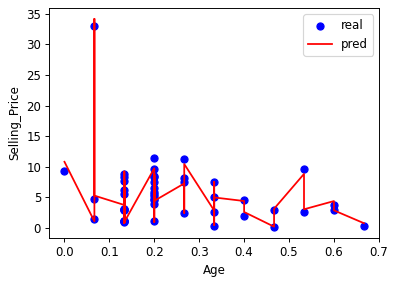

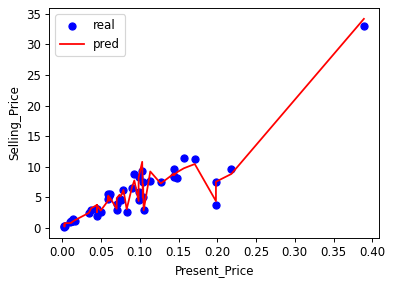

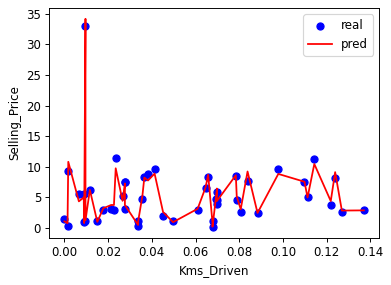

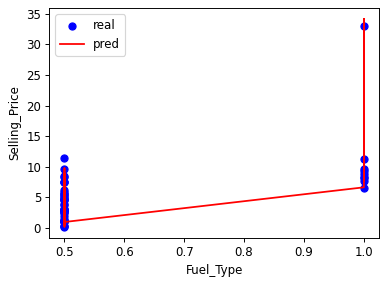

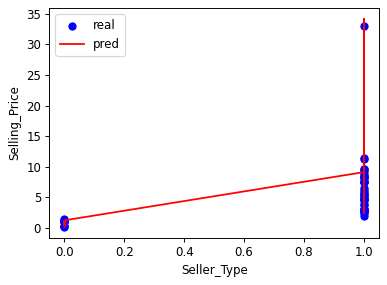

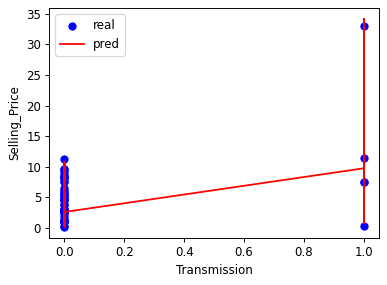

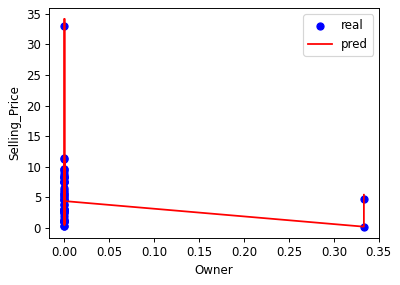

In [248]:
# df3 is final dataframe

# Normalize
X_norm = df3.drop(['Selling_Price'], axis = 1)
scaler = MinMaxScaler(feature_range = (0,1))
normalized = scaler.fit_transform(X_norm)

X = pd.DataFrame(normalized,  columns = X_norm.columns)
Y = df3['Selling_Price'].values.reshape(-1,1)

# test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Build and Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

R2_score_test = metrics.r2_score(Y_test,Y_pred_test)
R2_score_train = metrics.r2_score(Y_train,Y_pred_train)

# Evaluation
print('\nMean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred_test))
print('Mean squared Error: ', metrics.mean_squared_error(Y_test,Y_pred_test))
print('Root Mean squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
print('R2 score Train: ', metrics.r2_score(Y_train,Y_pred_train))
print('R2 score Test: ', metrics.r2_score(Y_test,Y_pred_test))

print('      -------------------\n')

# Add test and pred series
X_test['YTest'] = Y_test
X_test['YPred'] = Y_pred_test

# Plot 
for feature in col:
    X_test_sorted = X_test.sort_values(by=[feature])
    fig, ax = plt.subplots(1,1, figsize=(5,3.5) , dpi = 85)
    plt.scatter(X_test_sorted[feature],X_test_sorted['YTest'], color ='b')
    plt.plot(X_test_sorted[feature],X_test_sorted['YPred'] , color ='r' )
        
    plt.xlabel(f'{feature}')
    plt.ylabel('Selling_Price')
    plt.legend(labels=["real","pred"])
    plt.show()
    

<p style="font-size:190%;font-family:Sans-serif;font-weight: bold;">Test new data</p>

In [249]:
Age = 10
Present_Price = 11.23
Kms_Driven = 42000
Fuel_Type = 3 
Seller_Type = 3 
Transmission = 2 
Owner = 1

df_sample = pd.DataFrame({
        'Age' : [Age],
        'Present_Price' : [Present_Price],
        'Kms_Driven' : [Kms_Driven],
        'Fuel_Type' : [Fuel_Type],
        'Seller_Type' : [Seller_Type],  
        'Transmission' : [Transmission], 
        'Owner' : [Owner]  
    })


df_sample['Age2'] = df_sample['Age'] ** 2
df_sample['Present_Price2'] = df_sample['Present_Price'] ** 2
df_sample['Kms_Driven2'] = df_sample['Kms_Driven'] ** 2
df_sample['Fuel_Type2'] = df_sample['Fuel_Type'] ** 2
df_sample['Transmission2'] = df_sample['Transmission'] ** 2
df_sample['Owner2'] = df_sample['Owner'] ** 2


df_sample['PP_A'] =  df_sample['Present_Price'] * df_sample['Age'] 
df_sample['PP2_A'] =  df_sample['Present_Price2'] * df_sample['Age'] 
df_sample['PP_A2'] =  df_sample['Present_Price'] * df_sample['Age2'] 
df_sample['PP2_A2'] =  df_sample['Present_Price2'] * df_sample['Age2'] 

# df_sample['PP_T'] =  df_sample['Present_Price'] * df_sample['Transmission'] 
# df_sample['PP2_T'] =  df_sample['Present_Price2'] * df_sample['Transmission'] 
# df_sample['PP_T2'] =  df_sample['Present_Price'] * df_sample['Transmission2'] 
# df_sample['PP2_T2'] =  df_sample['Present_Price2'] * df_sample['Transmission2'] 

df_sample['PP_O'] =  df_sample['Present_Price'] * df_sample['Owner'] 
df_sample['PP2_O'] =  df_sample['Present_Price2'] * df_sample['Owner'] 
df_sample['PP_O2'] =  df_sample['Present_Price'] * df_sample['Owner2'] 
df_sample['PP2_O2'] =  df_sample['Present_Price2'] * df_sample['Owner2'] 

df_sample['PP_FT'] = df_sample['Present_Price'] * df_sample['Fuel_Type']
df_sample['PP2_FT'] =  df_sample['Present_Price2'] * df_sample['Fuel_Type'] 
df_sample['PP_FT2'] = df_sample['Present_Price'] * df_sample['Fuel_Type2']
df_sample['PP2_FT2'] =  df_sample['Present_Price2'] * df_sample['Fuel_Type2'] 

df_sample['PP_KD'] = df_sample['Present_Price'] * df_sample['Kms_Driven']
df_sample['PP2_KD'] = df_sample['Present_Price2']* df_sample['Kms_Driven'] 
df_sample['PP_KD2'] = df_sample['Present_Price'] * df_sample['Kms_Driven2']
df_sample['PP2_KD2'] = df_sample['Present_Price2']* df_sample['Kms_Driven2'] 


In [250]:
# Normalize sample data
normalized = scaler.transform(df_sample)
X_sample = pd.DataFrame(normalized,  columns = df_sample.columns)

# Train model with whole data
model = LinearRegression()
model.fit(X, Y)

# Predict Selling price of the sample 
Y_sample = model.predict(X_sample)
print('Price of the sample: ',Y_sample[0][0])

Price of the sample:  5.500103379911762


<br><p style="font-size:150%;font-family:Sans-serif;">Thanks for your attention.</p>